# Web Scraping IMDB

# Step 1 : Install and import necessary Libraries

In [8]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# Step 2 : Choose the data you need to extract

Access the HTML content from the webpage by assigning the URL and creating a soup object.

In [9]:

# Downloading imdb top 250 movie's data

url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
#soup = BeautifulSoup(response.text, "html.parser")


# Step 3 : Send HTTP request to the URL of the page you want to scrape

Now that we have got the HTML content of the page, we need to parse the data and store it in soup variable to structure it into a different format which will help in data extraction.

In [10]:
soup = BeautifulSoup(response.text, "html.parser")

In [11]:

movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') 
        for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]


In [12]:

list = []                                                        # create an empty list for storing movie information
for index in range(0, len(movies)):                              # Iterating over movies to extract each movie's details
    movie_string = movies[index].get_text()                      # Separating movie into: 'place','title', 'year'
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,"movie_title": movie_title,"rating": ratings[index],"year": year,"star_cast": crew[index]}
    list.append(data)
    

# Step 4 : Inspect the page and write codes for extraction

list the top IMBD movies along with their details. Then display the list of movie details.

In [13]:

for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'] +')-', 'Starring:', movie['star_cast'], movie['rating'])
    

1 - The Shawshank Redemption (1994)- Starring: Frank Darabont (dir.), Tim Robbins, Morgan Freeman 9.235741315782999
2 - The Godfather (1972)- Starring: Francis Ford Coppola (dir.), Marlon Brando, Al Pacino 9.155873305732717
3 - The Dark Knight (2008)- Starring: Christopher Nolan (dir.), Christian Bale, Heath Ledger 8.99154099877385
4 - The Godfather Part II (1974)- Starring: Francis Ford Coppola (dir.), Al Pacino, Robert De Niro 8.98382474525402
5 - 12 Angry Men (1957)- Starring: Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb 8.953003528146871
6 - Schindler's List (1993)- Starring: Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes 8.93996999006264
7 - The Lord of the Rings: The Return of the King (2003)- Starring: Peter Jackson (dir.), Elijah Wood, Viggo Mortensen 8.932248191651524
8 - Pulp Fiction (1994)- Starring: Quentin Tarantino (dir.), John Travolta, Uma Thurman 8.846418348029149
9 - The Lord of the Rings: The Fellowship of the Ring (2001)- Starring: Peter Jackson (dir.), Elijah

In [14]:
# saving the list as dataframe then converting into imdb_top_250_movies.csv file

df = pd.DataFrame(list)
df.to_csv('imdb_top_250_movies.csv',index=False)


# Data Visualization and EDA

# Import Libraries

In [15]:
# import data visualization and manipulation libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1 : Loading the Dataset ( IMDB )

In [16]:
# read the csv file into dataframe object

imdb_df=pd.read_csv("imdb_top_250_movies.csv")

In [17]:
# display all the contents or data in the dataframe

imdb_df

,place,movie_title,rating,year,star_cast
0,1,The Shawshank Redemption,9.235741,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre..."
1,2,The Godfather,9.155873,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al..."
2,3,The Dark Knight,8.991541,2008,"Christopher Nolan (dir.), Christian Bale, Heat..."
3,4,The Godfather Part II,8.983825,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert..."
4,5,12 Angry Men,8.953004,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb"
...,...,...,...,...,...
245,246,Dersu Uzala,8.005359,1975,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So..."
246,247,The Help,8.005197,2011,"Tate Taylor (dir.), Viola Davis, Emma Stone"
247,248,Aladdin,8.003953,1992,"Ron Clements (dir.), Scott Weinger, Robin Will..."
248,249,Dances with Wolves,8.001788,1990,"Kevin Costner (dir.), Kevin Costner, Mary McDo..."


In [18]:
# display the first 10 datas in the dataframe

imdb_df.head(10)

,place,movie_title,rating,year,star_cast
0,1,The Shawshank Redemption,9.235741,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre..."
1,2,The Godfather,9.155873,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al..."
2,3,The Dark Knight,8.991541,2008,"Christopher Nolan (dir.), Christian Bale, Heat..."
3,4,The Godfather Part II,8.983825,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert..."
4,5,12 Angry Men,8.953004,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb"
5,6,Schindler's List,8.939970,1993,"Steven Spielberg (dir.), Liam Neeson, Ralph Fi..."
6,7,The Lord of the Rings: The Return of the King,8.932248,2003,"Peter Jackson (dir.), Elijah Wood, Viggo Morte..."
7,8,Pulp Fiction,8.846418,1994,"Quentin Tarantino (dir.), John Travolta, Uma T..."
8,9,The Lord of the Rings: The Fellowship of the Ring,8.810895,2001,"Peter Jackson (dir.), Elijah Wood, Ian McKellen"
9,1,"Il buono, il brutto, il cattivo",8.788975,1966,"Sergio Leone (dir.), Clint Eastwood, Eli Wallach"


In [35]:
# display the last 10 datas in the dataframe

imdb_df.tail(10)

,place,movie_title,rating,year,star_cast
240,241,The Sound of Music,8.013245,1965,"Robert Wise (dir.), Julie Andrews, Christopher..."
241,242,It Happened One Night,8.012750,1934,"Frank Capra (dir.), Clark Gable, Claudette Col..."
242,243,Persona,8.011819,1966,"Ingmar Bergman (dir.), Bibi Andersson, Liv Ull..."
243,244,Life of Brian,8.009374,1979,"Terry Jones (dir.), Graham Chapman, John Cleese"
244,245,The Iron Giant,8.006091,1999,"Brad Bird (dir.), Eli Marienthal, Harry Connic..."
245,246,Dersu Uzala,8.005359,1975,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So..."
246,247,The Help,8.005197,2011,"Tate Taylor (dir.), Viola Davis, Emma Stone"
247,248,Aladdin,8.003953,1992,"Ron Clements (dir.), Scott Weinger, Robin Will..."
248,249,Dances with Wolves,8.001788,1990,"Kevin Costner (dir.), Kevin Costner, Mary McDo..."
249,250,Gandhi,8.001709,1982,"Richard Attenborough (dir.), Ben Kingsley, Joh..."


In [19]:
# prints the no of columns in csv file

imdb_df.columns

Index(['place', 'movie_title', 'rating', 'year', 'star_cast'], dtype='object')

# Step 2 : Data Profilling and Cleaning

In [20]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   place        250 non-null    int64  
 1   movie_title  250 non-null    object 
 2   rating       250 non-null    float64
 3   year         250 non-null    int64  
 4   star_cast    250 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 9.9+ KB


In [22]:
# check if any column contains null values

print("\nColumns with missing value\n") 
print(imdb_df.isnull().any())


Columns with missing value

place          False
movie_title    False
rating         False
year           False
star_cast      False
dtype: bool


# Handling Null values

In [23]:
# There are a few columns that contain null values,to get the total no of null value columns we use isnull()+sum()+sum() method

imdb_df.isnull().sum().sum()

0

In [24]:
# count the no of null values in each column,to get this by using isnull()+sum() method

imdb_df.isnull().sum()

place          0
movie_title    0
rating         0
year           0
star_cast      0
dtype: int64

# Step 3 : EDA and Visualization

In [25]:
# seperate some of the data into numeric and categorical

df_num = imdb_df[['rating','year']]
df_cat = imdb_df[['place','movie_title','star_cast']]

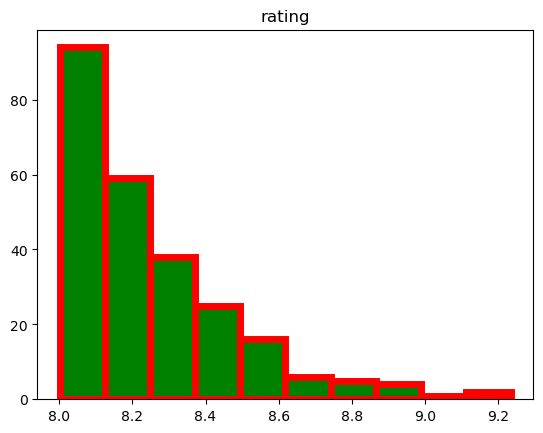

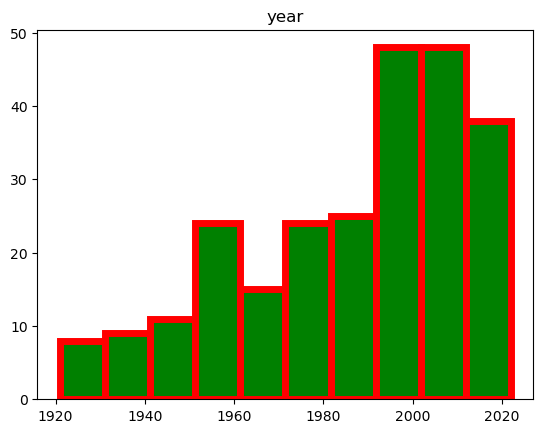

In [28]:
# plot numeric data(Histogrm)

for i in df_num.columns:
    plt.hist(df_num[i],color="green",ec="red",lw=5)
    plt.title(i)
    plt.show()

<AxesSubplot:>

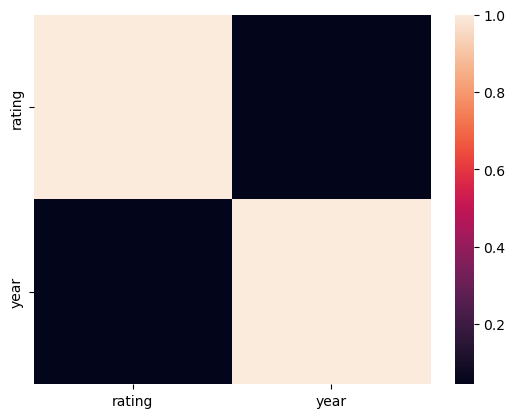

In [29]:
# plot a correlation heatmap between the numeric columns
# (heatmap)

sns.heatmap(df_num.corr())
 

In [38]:
# Top 10 movies on IMDB

imdb_df.movie_title.value_counts().head(10)

The Shawshank Redemption                     1
Tonari no Totoro                             1
Gone with the Wind                           1
Lock, Stock and Two Smoking Barrels          1
Inside Out                                   1
Dial M for Murder                            1
El secreto de sus ojos                       1
Hauru no ugoku shiro                         1
Three Billboards Outside Ebbing, Missouri    1
Trainspotting                                1
Name: movie_title, dtype: int64

Text(0.5, 1.0, '\n\nTop movie in IMDB\n\n')

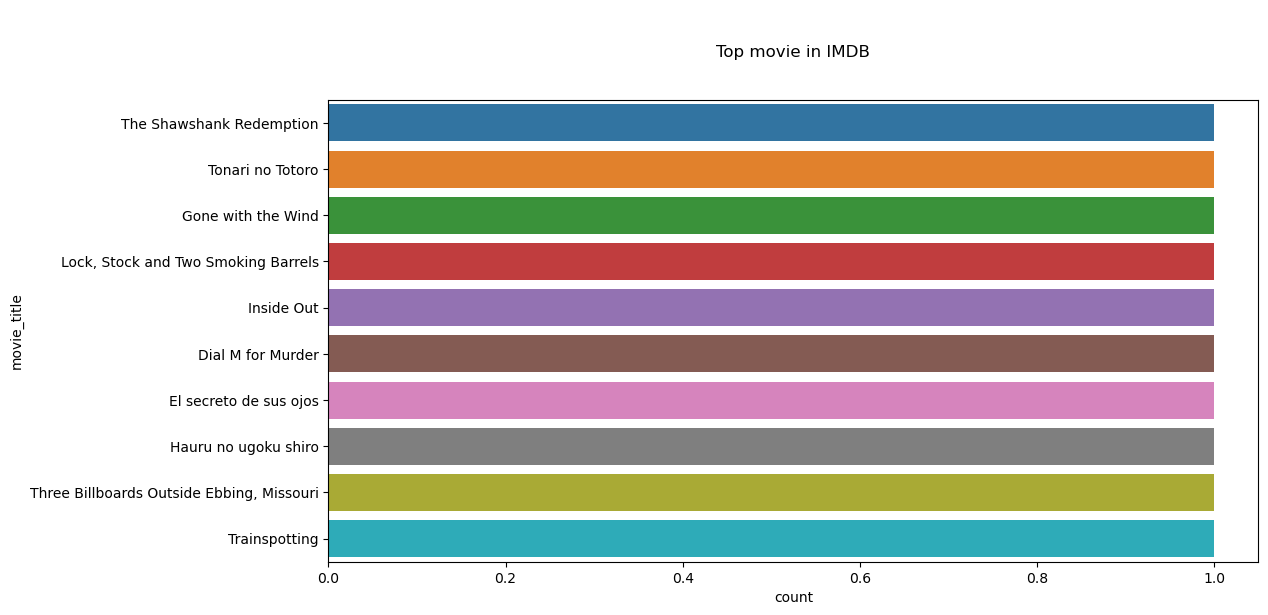

In [39]:
# plot a barchart based on the above information

plt.figure(figsize=(12,6))
sns.countplot(y="movie_title",order=imdb_df["movie_title"].value_counts().index[0:10],data=imdb_df)
plt.title("\n\nTop movie in IMDB\n\n")

Since we want to find out how well movies are liked or disliked,it is identifed by using rating .so the most important variable is the movie rating.

In [40]:
imdb_df['rating'].value_counts()

9.235741    1
8.092231    1
8.121681    1
8.120190    1
8.119889    1
           ..
8.264118    1
8.261650    1
8.261622    1
8.259311    1
8.001709    1
Name: rating, Length: 250, dtype: int64

A histogram will show you the distribution and the describe() method will give additional basic statistics.
describe() method will display basic statistics about a column.

In [41]:
imdb_df['rating'].describe()

count    250.000000
mean       8.253282
std        0.232543
min        8.001709
25%        8.074229
50%        8.199530
75%        8.361322
max        9.235741
Name: rating, dtype: float64

Visual representation of the above data by creating a histogram.

<AxesSubplot:>

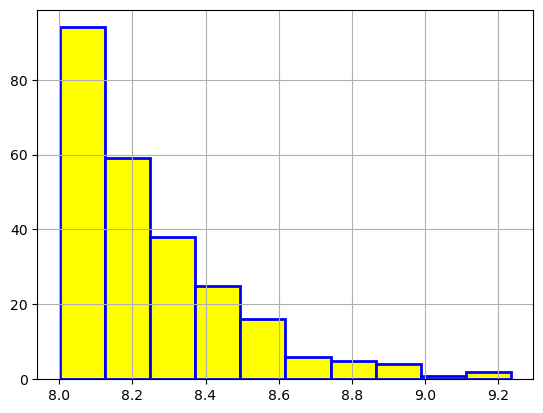

In [47]:
imdb_df['rating'].hist(bins=10,color ="yellow",ec="blue",lw=2)

# Conclusion

We want to find out how well movies are liked or disliked,it is identifed by using rating .so the most important variable is the movie rating.
Conclusions are already given in each analysis.

# References

1. IMDB Dataset
2. Tutorials point(pandas,seaborn,matplotlib)
3. W3school(pandas,seaborn,matplotlib)
4. Google for EDA
5. Youtube for EDA
6. and Various sites.